# Winter 2021 Data Science Intern Challenge 

### The following data analysis refers to the challenge launched by shopify for the selection for the winter 2021 internship program.

**Question 1:** Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

**The main problem found in the dataset was the existence of a small number of orders strongly influencing the average - what we call outliers. The removal of these values for analysis purposes will favor the interpretation of the metrics.**

- What metric would you report for this dataset?

**The dataset has 17 orders (from shop_id 42) representing B2B operations. In addition, we can find some orders, such as order_id #692 which certainly represents a purchase of a luxury sneaker and this will continue to pull the average up.** 

- What is its value?

**I suggest adopting the median of the processed dataset for a more reliable OAV. The value is $272.**


**Question 2:** For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

- How many orders were shipped by Speedy Express in total?

**NumberOfOrders: 54**

```sql
SELECT COUNT(*) AS NumberOfOrders
FROM Orders
JOIN Shippers
ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express' 


- What is the last name of the employee with the most orders?

**LastName: Peacock**


```sql
SELECT Employees.LastName, COUNT(*) AS NumberOfOrders
FROM Orders
JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY NumberOfOrders DESC
LIMIT 1```


- What product was ordered the most by customers in Germany?

**ProductName: *Boston Crab Meat*, TotalOrdered: *160***

Query:

```sql
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS "totalOrdered"
FROM Orders
JOIN Customers
ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails
ON OrderDetails.OrderID = Orders.OrderID
JOIN Products
ON Products.ProductID = OrderDetails.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY totalOrdered DESC ```


# Answers' explanation

In [ ]:
#First of all, we need to import some libs and read de csv file
import pandas as pd   #for data processing
import numpy as np   #a lienar algebra lib

df = pd.read_csv("dsChallenge.csv")

In [ ]:
#In order to understand the data, we need to display some occurrences and check for descriptive statistics
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
df.describe().round(2)

,order_id,shop_id,user_id,order_amount,total_items
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,50.08,849.09,3145.13,8.79
std,1443.52,29.01,87.80,41282.54,116.32
min,1.00,1.00,607.00,90.00,1.00
25%,1250.75,24.00,775.00,163.00,1.00
50%,2500.50,50.00,849.00,284.00,2.00
75%,3750.25,75.00,925.00,390.00,3.00
max,5000.00,100.00,999.00,704000.00,2000.00


By analyzing the table above, it's possible to understand that the 'order_amount' mean was used calculate the average order value (AOV). Although the AOV ends up being a mean, it's not correct to use it in the case at hand because the standard deviation (std) is 41282.54, this means that we probably have outliers impacting the mean.

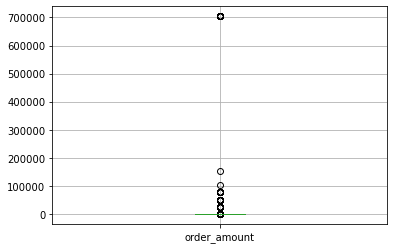

In [ ]:
#Let's create a boxplot and search for some outliers
df.boxplot(column='order_amount')

The boxplot showed us that we have many outliers in such a way that the upper values have compressed the box to the shape next to a line in our chart. This also explains why the mean and standard deviation are so high. Extremely high outliers interfere with the mean and make the AOV unreal. Once said that the sneakers are a relatively affordable items, the AOV should be a lower value to reflect the actual orders.

Skewness can show how uneven the distribuition is. The closer to zero, the more normal the distribution will be

In [ ]:
skewness = df['order_amount'].skew()
skewness

16.675033432503792

Let's check some of the outliers and try to understand better the dataset:

In [ ]:
outliers = df.sort_values('order_amount', ascending = False)
outliers.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


As shown in the chart above, the dataset shows orders with 2000 units of sneakers. This tends to represent a business to business (B2B) operation and would be outside the scope of our analysis.

One way to achieve a more accurate AOV is to exclude outliers from the analysis and use the Inter-Quartile Range to work only with the most common data, which represents business to clients (B2C) operations. In a Gaussian distribution about 99.72% of the whole data lies within three standard deviations (<3σ) of the mean (μ). To achieve this result and create a more appropriate dataset, we need to use the interquartile distance, multiply it by 1.5 and add it to the median (quartile 0.5), and do the same process but now subtracting. The reason for choosing 1.5 as the scale is because 

In [ ]:
#Inter-Quartile Range
IQR = df['order_amount'].quantile(0.75) - df['order_amount'].quantile(0.25)

In [ ]:
q2 = df['order_amount'].quantile(0.5)
df_truncated = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]

In [ ]:
#New skewness check
df_truncated['order_amount'].skew()

0.5476746052976321

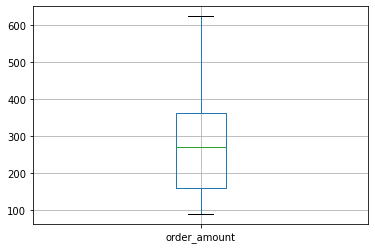

In [ ]:
df_truncated.boxplot(column='order_amount')

The result after the data processing was satisfactory. Skewness and standard deviation decreased with regard to what we found in the original dataset. The boxplot is also better to visualize. However, the skewness higher than zero indicates that the distribution is slightly asymmetric, with the tail to the right. Thus, we suggest to adopt the median for a more reliable AOV.

In [ ]:
df_truncated.describe().round(2)

,order_id,shop_id,user_id,order_amount,total_items
count,4738.00,4738.00,4738.00,4738.00,4738.00
mean,2500.87,49.77,850.33,283.81,1.90
std,1444.27,29.15,86.80,132.06,0.86
min,1.00,1.00,700.00,90.00,1.00
25%,1247.25,24.00,776.00,161.00,1.00
50%,2502.50,50.00,851.00,272.00,2.00
75%,3755.75,74.00,926.00,362.00,2.00
max,5000.00,100.00,999.00,624.00,5.00


## Final considerations

By removing the outliers we can achieve a result that represents most B2C operations. Although there are still some purchases with above average values (which is demonstrated through the slightly positive skeness), we can adopt the median as the most central measure of distribution.